# **Comprehensive Analysis of Electric Vehicle Registrations in Washington State: Insights from 2024 Data**

# **Goal of the Project**

The goal of this project is to analyze the dataset of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered in Washington State as of December 12, 2024. By exploring this dataset, my aim is to derive meaningful insights, identify trends in EV adoption, and understand regional variations in EV distribution. This analysis will also highlight the potential for future EV growth and challenges.

# **Introduction**

With the rapid adoption of electric vehicles (EVs), Washington State has become a key player in the transition to sustainable transportation. This dataset, provided by the Washington State Department of Licensing (DOL), includes comprehensive information about BEVs and PHEVs registered statewide. This analysis aims to uncover trends, evaluate the adoption of EVs across regions, and highlight the characteristics of EVs currently in use.

# **Data Story**

[Electric Vehicle Registrations in Washington State - Dataset](https://drive.google.com/file/d/1lEh-3NKpF3Nxac3CTGq9rBReyJ0eBJp8/view?usp=sharing)

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL). It was last updated on
December 12, 2024.

# **Dataset Overview**
The dataset contains 220,225 entries and 17 columns. Here's what each column represents:

**VIN (1-10)**: First 10 characters of the Vehicle Identification Number.

**County**: County of the vehicle's registration.

**City**: City of the vehicle's registration.

**State**: State of registration (all entries are from Washington State).

**Postal Code**: Zip code of the vehicle's registration location.

**Model Year**: The year the vehicle model was manufactured.

**Make**: Manufacturer of the vehicle.

**Model**: Specific model of the vehicle.

**Electric Vehicle Type**: Type of vehicle (Battery Electric Vehicle or Plug-in Hybrid Electric Vehicle).

**Clean Alternative Fuel Vehicle (CAFV) Eligibility**: Indicates whether the vehicle is eligible for clean fuel benefits.

**Electric Range**: Maximum electric-only range of the vehicle (in miles).

**Base MSRP**: Manufacturer's Suggested Retail Price of the vehicle.

**Legislative District**: Washington State legislative district where the vehicle is registered.

**DOL Vehicle ID**: Unique identifier assigned by the Department of Licensing.

**Vehicle Location**: Geographical coordinates of the vehicle's registration.

**Electric Utility**: Electric utility serving the area of registration.

**2020 Census Tract**: Census tract information for the registration area.

# **Tools Used**

Python Libraries: Pandas, NumPy, Matplotlib, Seaborn, Plotly

Platform: Google Colab



# **Overview of the Project**

**Dataset Evaluation:**

* Overview of the data structure, types, and basic statistics.

* Display the dataset.

**Data Preprocessing:**

* Handle missing values, duplicates, and outliers.


**Data Analysis:**

* Generate visualizations for exploratory data analysis (EDA).

* Derive insights through descriptive statistics.

**Conclusion and Future Directions:**

* Summarize findings, highlight limitations, and propose future research directions.

# **Initial Data Evaluation**

**Import Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [2]:
# Load the dataset
data = pd.read_csv('/content/Electric_Vehicle_Population_Data_20250107.csv')

**Initial Data Evaluation**

In [3]:
# Dataset Evaluation
print("Shape of the dataset:", data.shape)
print("\nDataset Information:")
print(data.info())
print("\nBasic Statistics:")
print(data.describe(include='all'))

# Display first few rows
print("\nFirst 5 rows:")
print(data.head())

Shape of the dataset: (220225, 17)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220225 entries, 0 to 220224
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         220225 non-null  object 
 1   County                                             220222 non-null  object 
 2   City                                               220222 non-null  object 
 3   State                                              220225 non-null  object 
 4   Postal Code                                        220222 non-null  float64
 5   Model Year                                         220225 non-null  int64  
 6   Make                                               220225 non-null  object 
 7   Model                                              220225 non-null  object 
 8   Electric Vehicle 

# **Data Preprocessing**

In [4]:
# checking for missing values
data.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [5]:
# Handle missing values
data['County'].fillna('Unknown', inplace=True)
data['City'].fillna('Unknown', inplace=True)
data['Postal Code'].fillna(data['Postal Code'].mode()[0], inplace=True)
data['Legislative District'].fillna(data['Legislative District'].median(), inplace=True)
data['Vehicle Location'].fillna('Unknown', inplace=True)
data['Electric Utility'].fillna('Unknown', inplace=True)
data['2020 Census Tract'].fillna(data['2020 Census Tract'].mode()[0], inplace=True)

print("Data after handling missing values :")
data.isnull().sum()

Data after handling missing values :


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [6]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [7]:
# shape after removing duplicates
data.shape

(220225, 17)

In [8]:
# Handle outliers using IQR method
numeric_columns = ['Electric Range', 'Base MSRP']
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [9]:
# shape after removing outliers
data.shape

(180620, 17)

In [10]:
data['County'].unique()

array(['King', 'Thurston', 'Yakima', 'Island', 'Kitsap', 'Snohomish',
       'Chelan', 'Whitman', 'Skagit', 'Spokane', 'Grant', 'Kittitas',
       'Stevens', 'Walla Walla', 'Clark', 'Cowlitz', 'Jefferson',
       'Clallam', 'Klickitat', 'Pierce', 'Okanogan', 'Pend Oreille',
       'Whatcom', 'Benton', 'Grays Harbor', 'Franklin', 'Mason',
       'Monterey', 'Pacific', 'Lewis', 'Lincoln', 'San Juan', 'Skamania',
       'Douglas', 'Wahkiakum', 'Asotin', 'Adams', 'Wasco', 'Orange',
       'San Diego', 'District of Columbia', 'Wake', 'Richland', 'Lake',
       'Kern', 'Churchill', 'Oldham', 'Polk', 'Anne Arundel', 'Riverside',
       'San Francisco', 'Ferry', 'DeKalb', 'New York', 'Kings',
       'Columbia', 'Leavenworth', 'Los Angeles', 'Santa Clara',
       'Montgomery', 'Garfield', 'Fairfax', 'Macomb', 'San Mateo',
       'Sacramento', 'Ada', 'James City', 'Collin', 'Virginia Beach',
       'Newport', 'Harnett', 'Cook', 'Maricopa', 'Geary', 'Richmond',
       'Frederick', 'Allegheny', 'A

In [11]:
data['Base MSRP'].value_counts()

,count
Base MSRP,
0,180620


In [12]:
# Base  MSRP has value 0 for all rows
# Drop the 'Base MSRP' column from the dataset
data = data.drop(columns=['Base MSRP'])


# **Visualizations**

**Distribution of EV Types**

Electric Vehicle Type
Battery Electric Vehicle (BEV)            136013
Plug-in Hybrid Electric Vehicle (PHEV)     44607
Name: count, dtype: int64




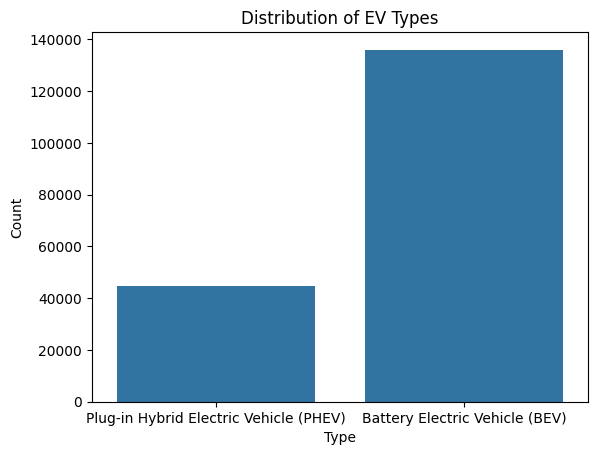

In [13]:
# Bar plot showing the count of BEVs and PHEVs.

# Get the counts of each category
ev_counts = data['Electric Vehicle Type'].value_counts()

# Display the counts for BEVs and PHEVs
print(ev_counts)

print("\n")
sns.countplot(x='Electric Vehicle Type', data=data)
plt.title('Distribution of EV Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()




There are 136,013 BEVs, indicating they form the majority of the electric vehicles in the dataset. There are 44,607 PHEVs, showing they are less common than BEVs.

**EV Registrations by County (Top 10 Countys)**

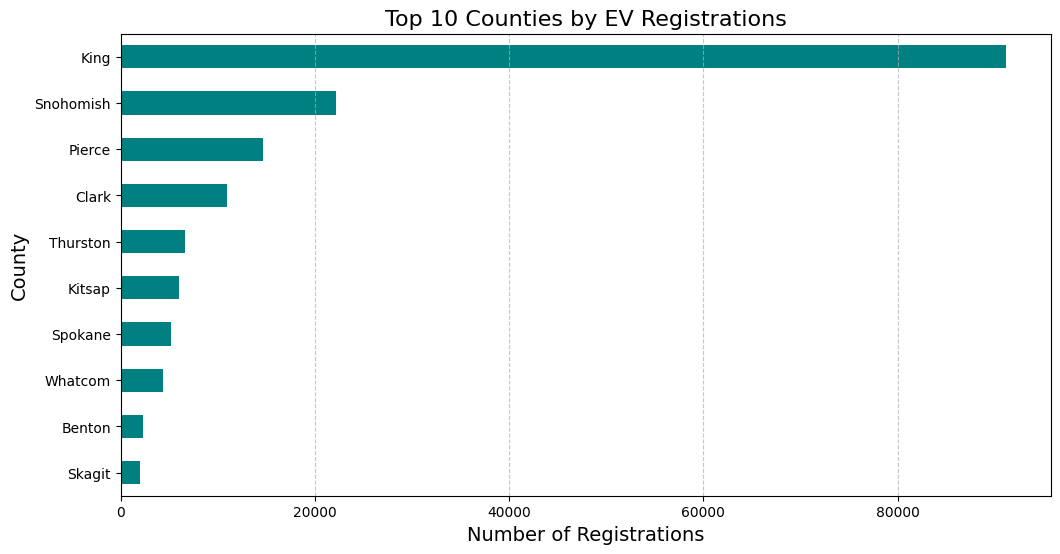

In [14]:
# Bar chart to show registration counts by county.
# Top 10 counties by EV registrations are taken
top_counties = data['County'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_counties.sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Counties by EV Registrations', fontsize=16)
plt.xlabel('Number of Registrations', fontsize=14)
plt.ylabel('County', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()




Top 10 Counties by EV registration are King, Snohomish, Pears, Clark, Thurston, Kitsap, Spokane, Whatcom, Benton, Skagit

**Model Year Trend**

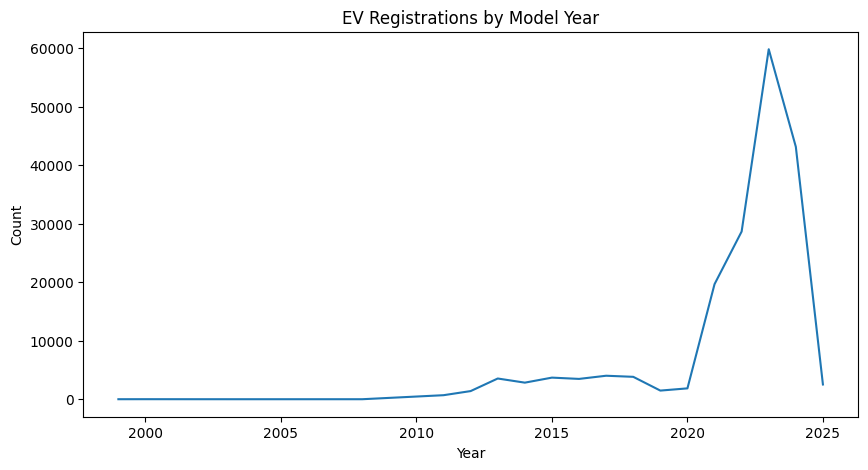

In [15]:
# Line graph showing trends in EV registrations by model year.
model_year_counts = data['Model Year'].value_counts().sort_index()
model_year_counts.plot(kind='line', figsize=(10, 5))
plt.title('EV Registrations by Model Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Maximum number of EV registrations occured in the year 2023.

**Geographical Distribution**

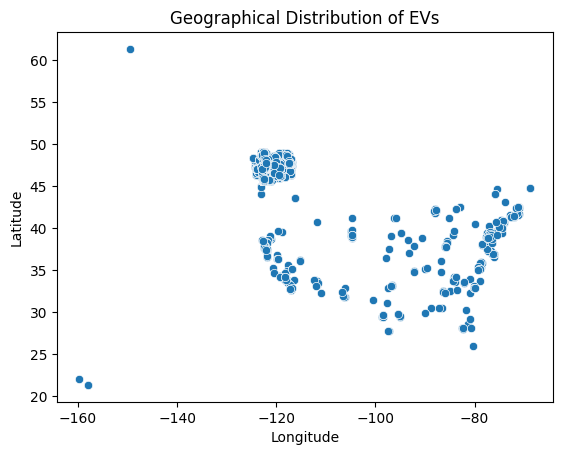

In [16]:
# Scatter plot overlayed on a map to show the geographical spread of EVs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

if 'Vehicle Location' in data.columns:
    # Function to extract latitude and longitude
    def extract_lat_lon(location):
        match = re.match(r'POINT \(([-\d.]+) ([-\d.]+)\)', location)
        if match:
            return float(match.group(1)), float(match.group(2))
        return None, None

    # Apply the function to the 'Vehicle Location' column and create Latitude and Longitude columns
    data[['Longitude', 'Latitude']] = data['Vehicle Location'].apply(lambda x: pd.Series(extract_lat_lon(x)))

    # Plotting the data
    sns.scatterplot(x='Longitude', y='Latitude', data=data)
    plt.title('Geographical Distribution of EVs')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


 **Legislative District Analysis**

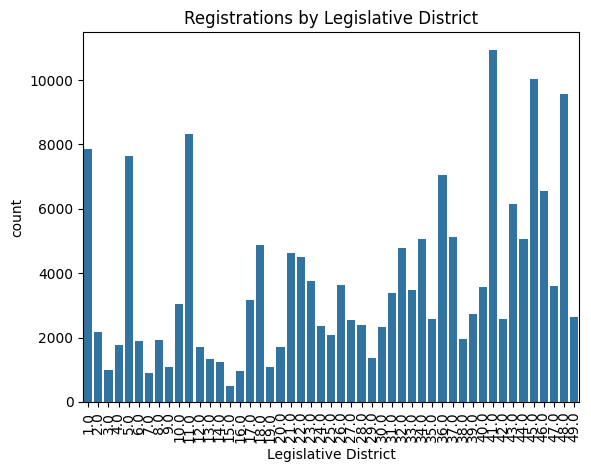

In [17]:
# 7. Legislative District Analysis
# Plot showing registration density across legislative districts.
sns.countplot(x='Legislative District', data=data)
plt.title('Registrations by Legislative District')
plt.xticks(rotation=90)
plt.show()

Maximum registrations occured in legislative district 41.0

Minimum registrations occured in legislative district 15.0

**Pie Chart of EV Types**

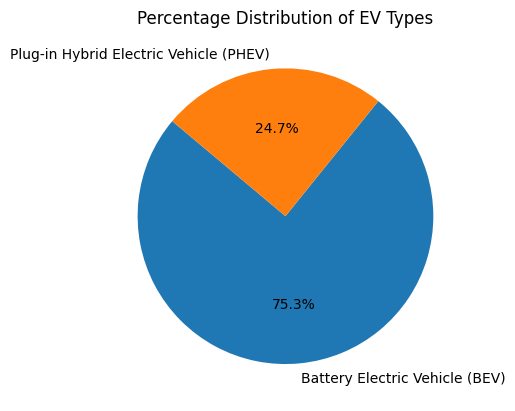

In [18]:
# Pie chart showing the percentage distribution of BEVs and PHEVs.
ev_type_counts = data['Electric Vehicle Type'].value_counts()
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of EV Types')
plt.show()

75.3% vehicles are BEV.

24.7% vehicles are PHEV.

**Top 10 Vehicke Makes by Registration**

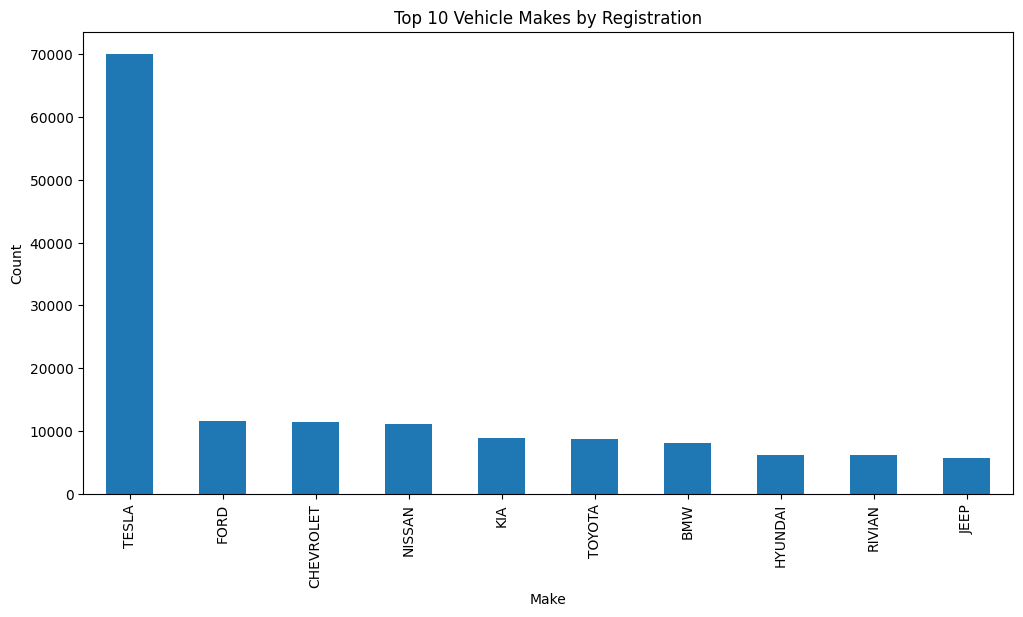

In [19]:
# Bar chart showing the frequency of different vehicle makes.
make_counts = data['Make'].value_counts()
make_counts[:10].plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Vehicle Makes by Registration')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

**Top 10 Electric Vehicle Models**

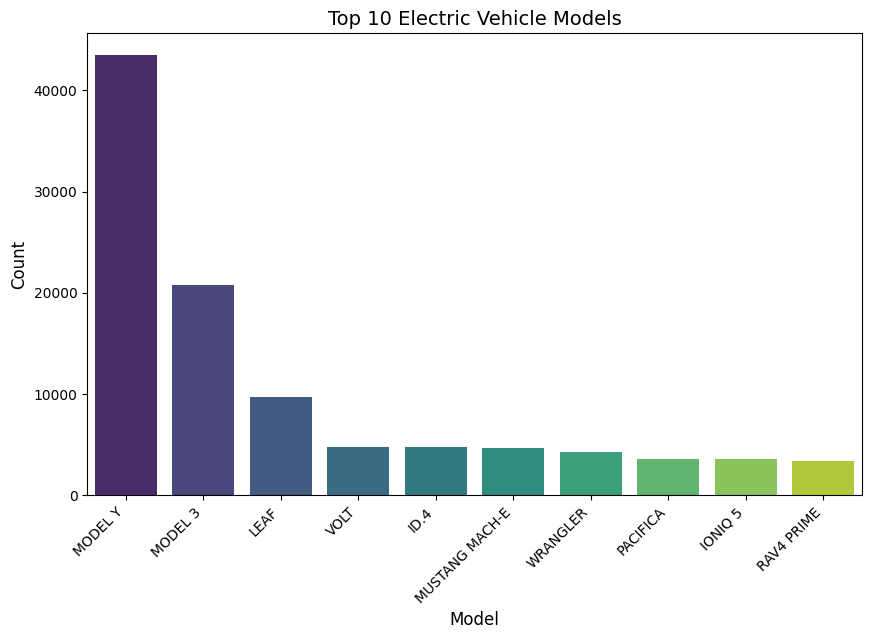

In [20]:
# Get the counts of different models in the 'Model' column and select the top 10
top_10_models = data['Model'].value_counts().head(10)

# Plot the top 10 models as a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the size of the plot
sns.barplot(x=top_10_models.index, y=top_10_models.values, palette='viridis')

# Customize the plot
plt.title('Top 10 Electric Vehicle Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


**Top 10 Counties with Most EV Registrations**

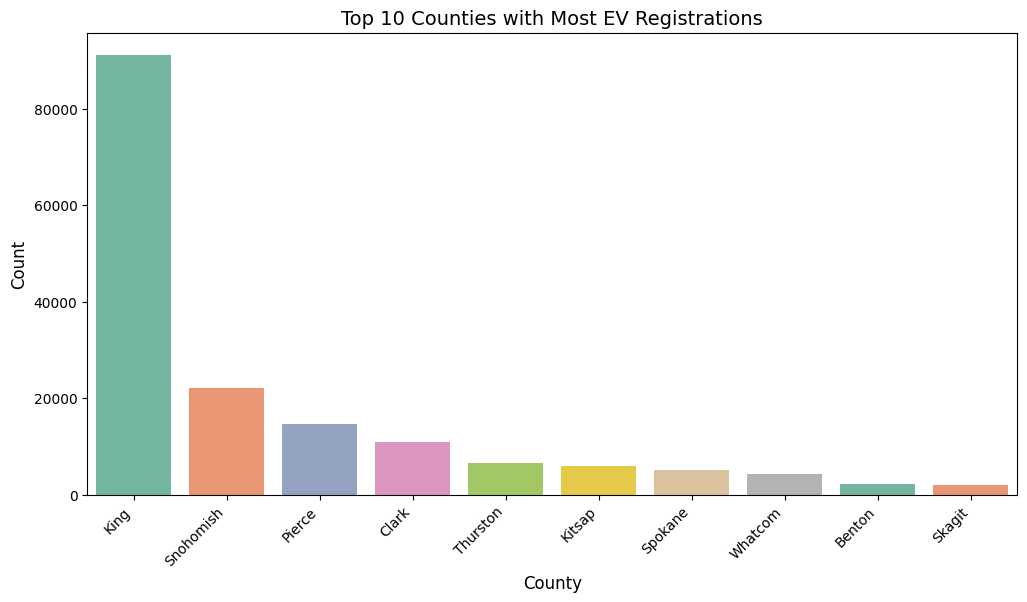

In [21]:
# Electric Vehicle Registrations by County
top_counties = data['County'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_counties.index, y=top_counties.values, palette='Set2')
plt.title('Top 10 Counties with Most EV Registrations', fontsize=14)
plt.xlabel('County', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


**Top 10 Legislative Districts with Most EV Registrations**

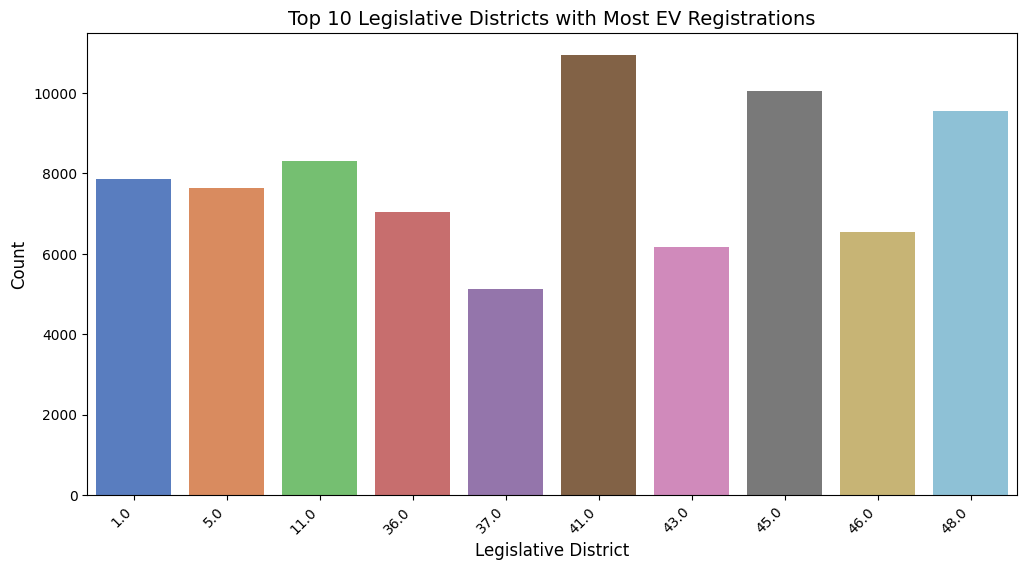

In [22]:
# Electric Vehicle Registrations by Legislative District
top_districts = data['Legislative District'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_districts.index, y=top_districts.values, palette='muted')
plt.title('Top 10 Legislative Districts with Most EV Registrations', fontsize=14)
plt.xlabel('Legislative District', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


**Clean Fuel Eligibility vs Electric Vehicle Type**

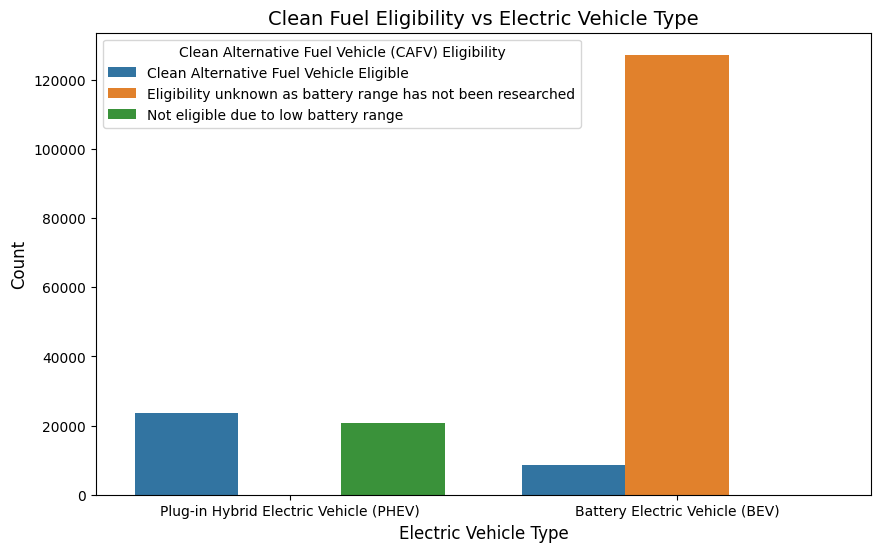

In [23]:
# Insight: Investigate how Clean Alternative Fuel Vehicle (CAFV) eligibility correlates with the vehicle type (Electric Vehicle Type).
# Action: Use a stacked bar plot to show the proportion of CAFV eligibility for BEVs and PHEVs.

plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=data)
plt.title('Clean Fuel Eligibility vs Electric Vehicle Type', fontsize=14)
plt.xlabel('Electric Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


For most of the BEVs, Clean Fuel Eligibility is unknown as battery range has not been researched. And the rest are eligible.

For PHEVs, some are not eligible due to low battery range and the others are eligible.

**Electric Vehicle Adoption Over Time (By Model Year)**

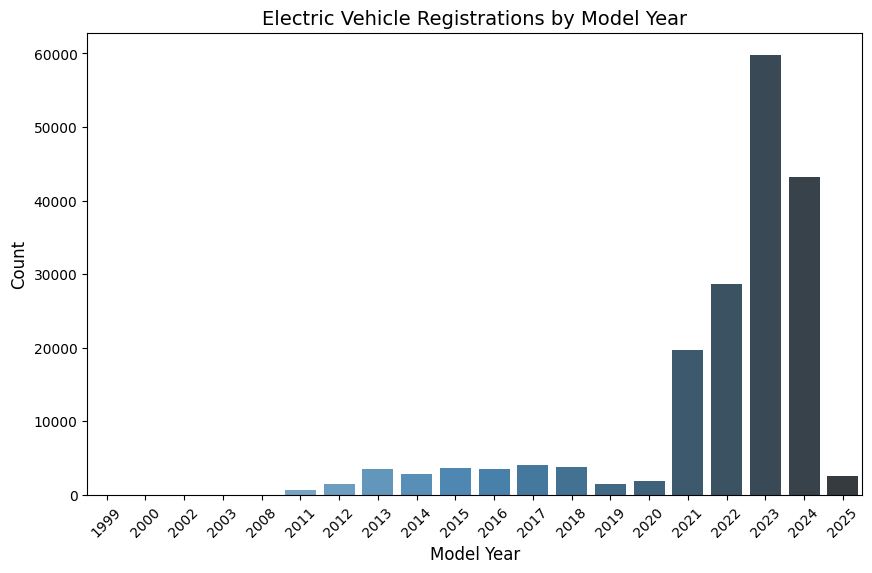

In [24]:
# Insight: Look at how the adoption of electric vehicles has changed over time based on the Model Year.
# Action: Create a time series plot or bar plot showing how the number of EVs registered increases or decreases over the years.

plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', data=data, palette='Blues_d')
plt.title('Electric Vehicle Registrations by Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Maximum number of registrations occured in the year 2023, followed by the years 2024 and 2022

**Comparing EV Adoption Based on Electric Utility**

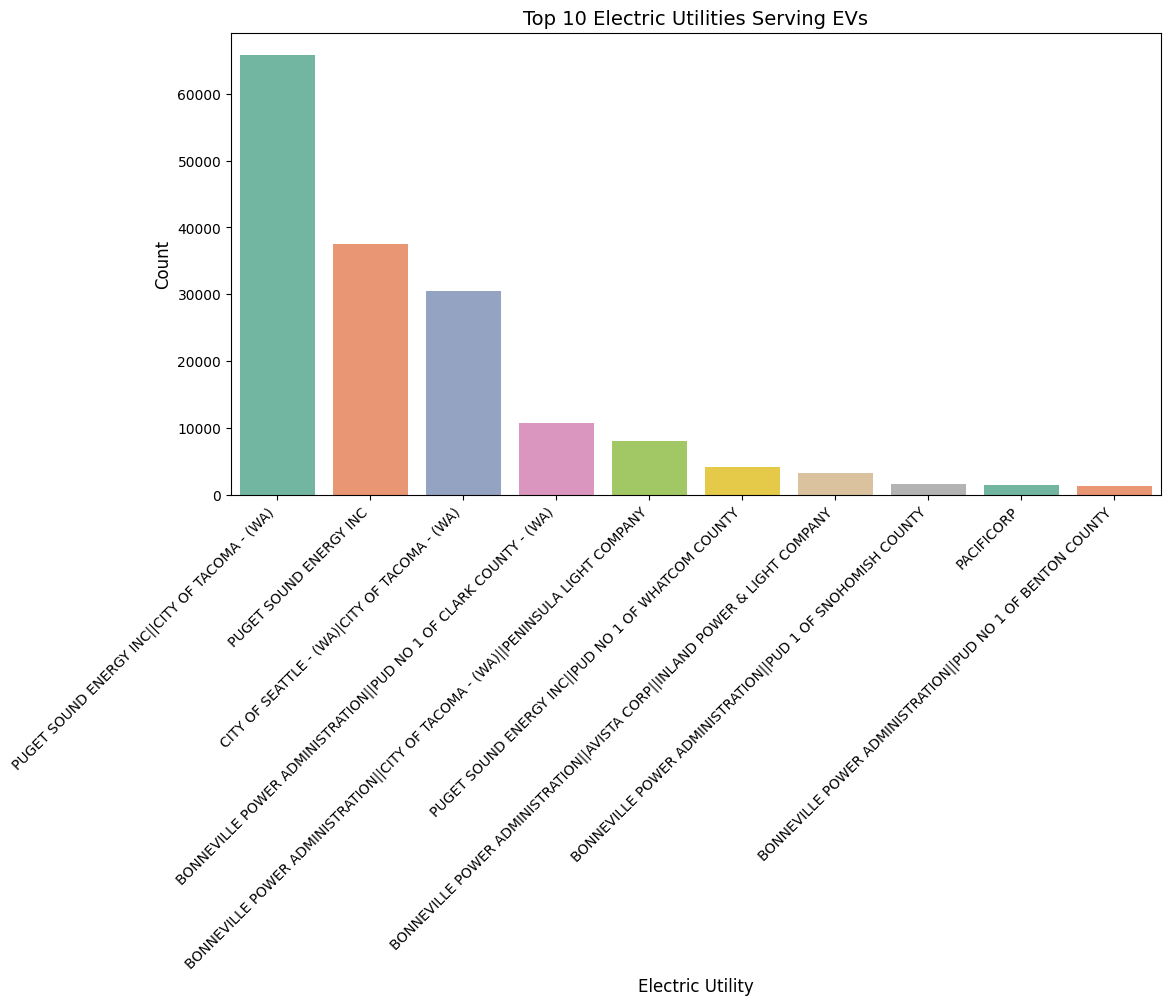

In [25]:
# Insight: Analyze how the choice of electric utility impacts the number of EVs registered in different areas.
# Action: Create a bar plot showing the number of EVs registered by Electric Utility.

top_utilities = data['Electric Utility'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_utilities.index, y=top_utilities.values, palette='Set2')
plt.title('Top 10 Electric Utilities Serving EVs', fontsize=14)
plt.xlabel('Electric Utility', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


**Assessing the Relationship Between Electric Range and Model Year**

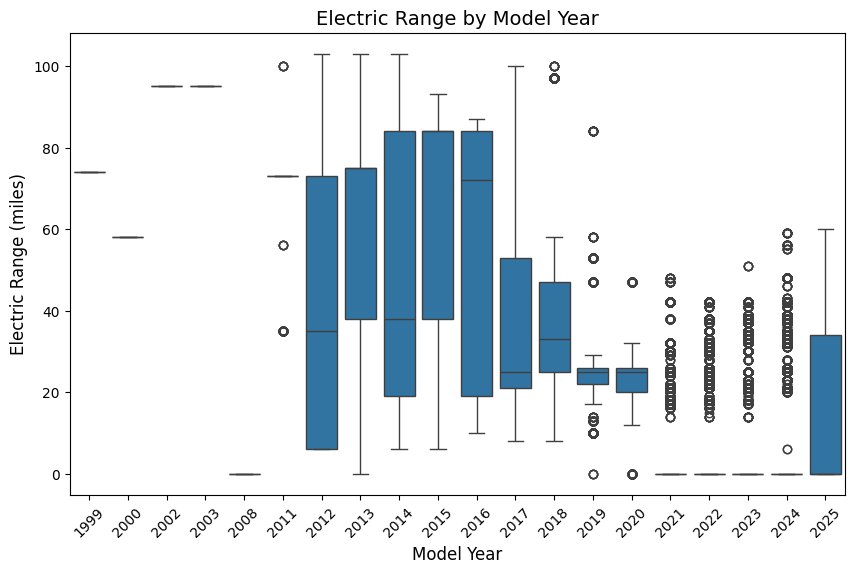

In [26]:
# Insight: Investigate how the electric range of EVs has improved over the years.
# Action: Plot the electric range for different Model Year to identify any trends.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model Year', y='Electric Range', data=data)
plt.title('Electric Range by Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Electric Range (miles)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [27]:
# Can see many outliers
# Checking for outliers in Electric Range using IQR method
Q1 = data['Electric Range'].quantile(0.25)
Q3 = data['Electric Range'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = data[(data['Electric Range'] < lower_bound) | (data['Electric Range'] > upper_bound)]

print(f"Number of outliers in Electric Range: {outliers.shape[0]}")


Number of outliers in Electric Range: 12371


In [28]:
# Remove outliers in Electric Range column
data_cleaned = data[(data['Electric Range'] >= lower_bound) & (data['Electric Range'] <= upper_bound)]


In [29]:
# Check for NaN or negative values
invalid_values = data[data['Electric Range'] <= 0]
print(f"Invalid values (<= 0): {invalid_values.shape[0]}")


Invalid values (<= 0): 127319


In [30]:
# Remove invalid values
data_cleaned = data_cleaned[data_cleaned['Electric Range'] > 0]


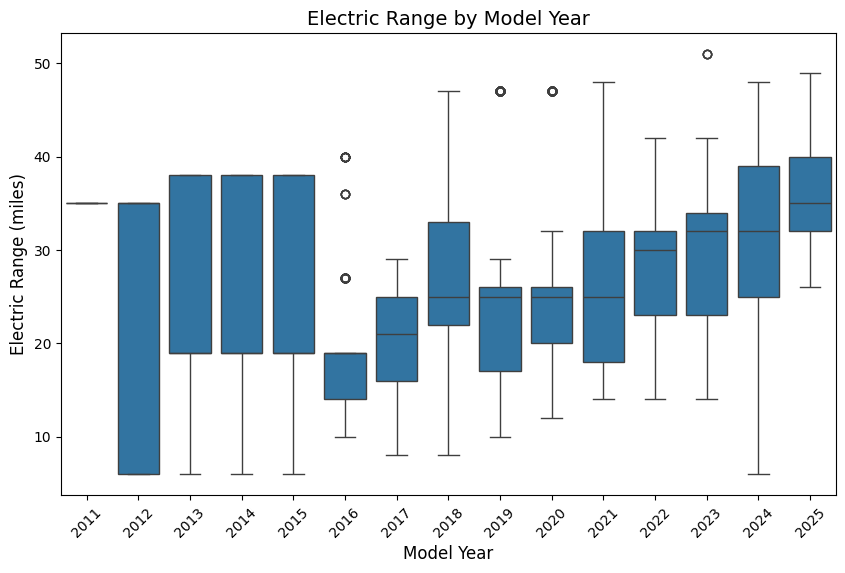

In [31]:
# replotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model Year', y='Electric Range', data=data_cleaned)
plt.title('Electric Range by Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Electric Range (miles)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Distribution of Electric Range**

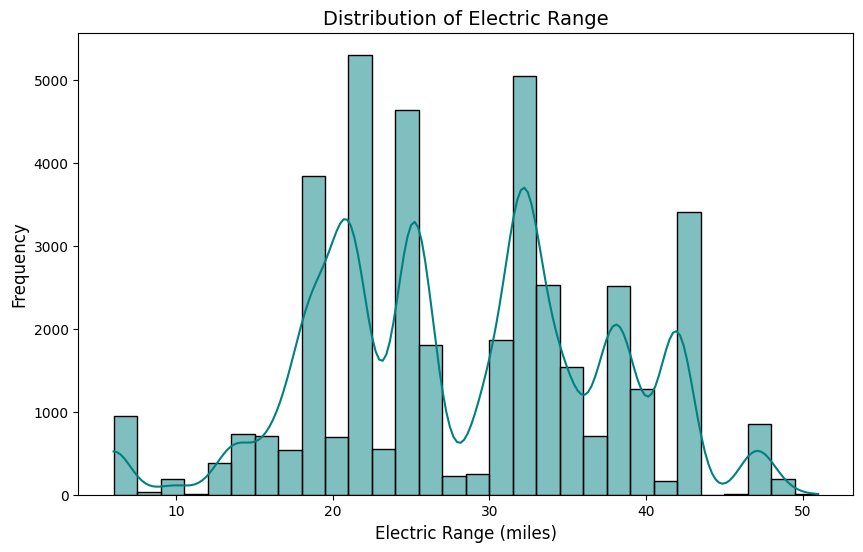

In [32]:
# Distribution of Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Electric Range'], kde=True, color='teal', bins=30)
plt.title('Distribution of Electric Range', fontsize=14)
plt.xlabel('Electric Range (miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

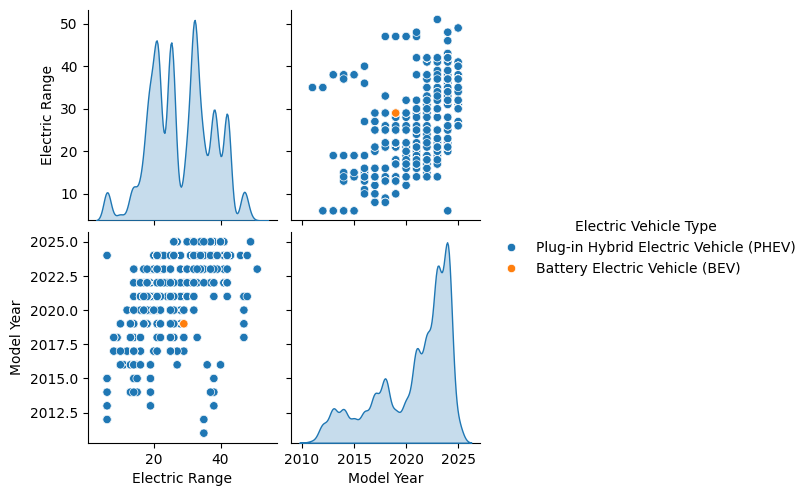

In [33]:
# 10. Pair plot to examine relationships among Electric Range and Model Year.

sns.pairplot(data_cleaned, vars=['Electric Range', 'Model Year'], hue='Electric Vehicle Type')
plt.show()

**Market Share of Top Makes by Model Year**

<Figure size 1200x800 with 0 Axes>

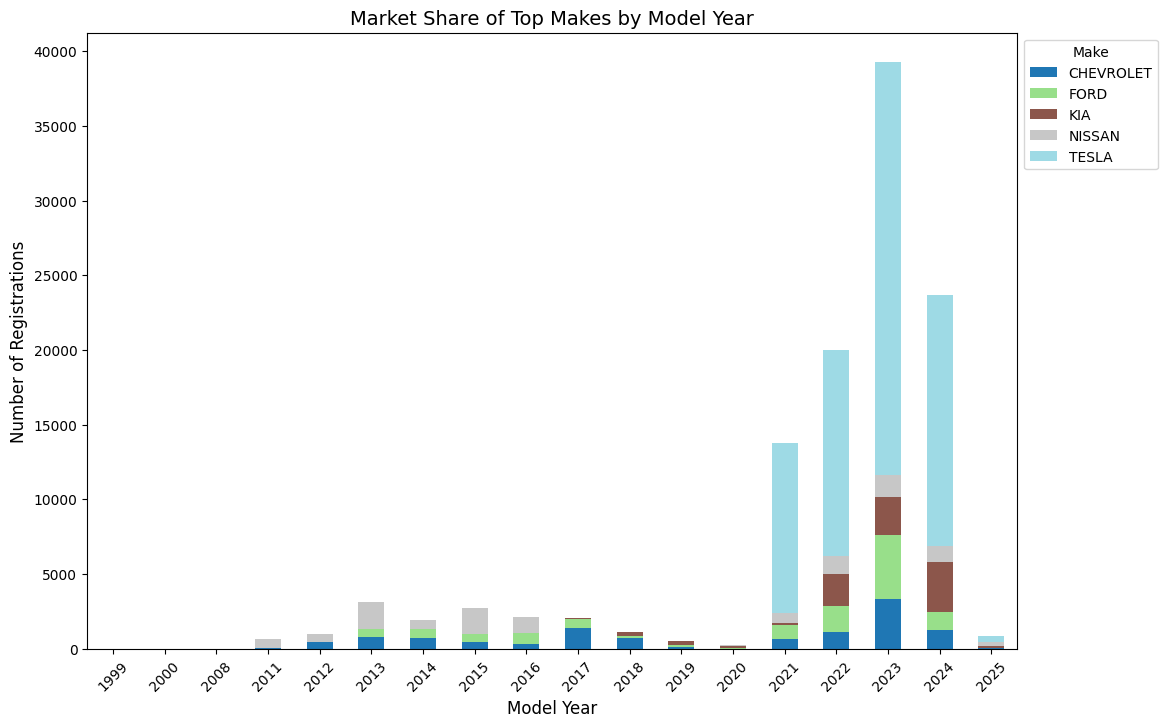

In [34]:
# Analyze the changes in market share of different Makes  over time.
# You can group by Model Year and Make to observe how popular each make is over time, and visualize it with a stacked bar chart.

# First, get the top N makes based on the number of registrations
top_n_makes = data['Make'].value_counts().head(5).index

# Filter the data to include only the top N makes
filtered_data = data[data['Make'].isin(top_n_makes)]

# Now, group by 'Model Year' and 'Make', and count the number of registrations
market_share = filtered_data.groupby(['Model Year', 'Make']).size().unstack()
market_share = market_share.fillna(0)

# Plotting the market share
plt.figure(figsize=(12, 8))
market_share.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 8))
plt.title('Market Share of Top Makes by Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Registrations', fontsize=12)
plt.legend(title='Make', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate model year labels for better readability
plt.show()


**Visualization of Top 10 Make-Model Combinations**

         Make           Model  Count
0       TESLA         MODEL Y  43481
1       TESLA         MODEL 3  20743
2      NISSAN            LEAF   9690
3   CHEVROLET            VOLT   4760
4  VOLKSWAGEN            ID.4   4717
5        FORD  MUSTANG MACH-E   4646
6        JEEP        WRANGLER   4222
7    CHRYSLER        PACIFICA   3609
8     HYUNDAI         IONIQ 5   3541
9      TOYOTA      RAV4 PRIME   3398




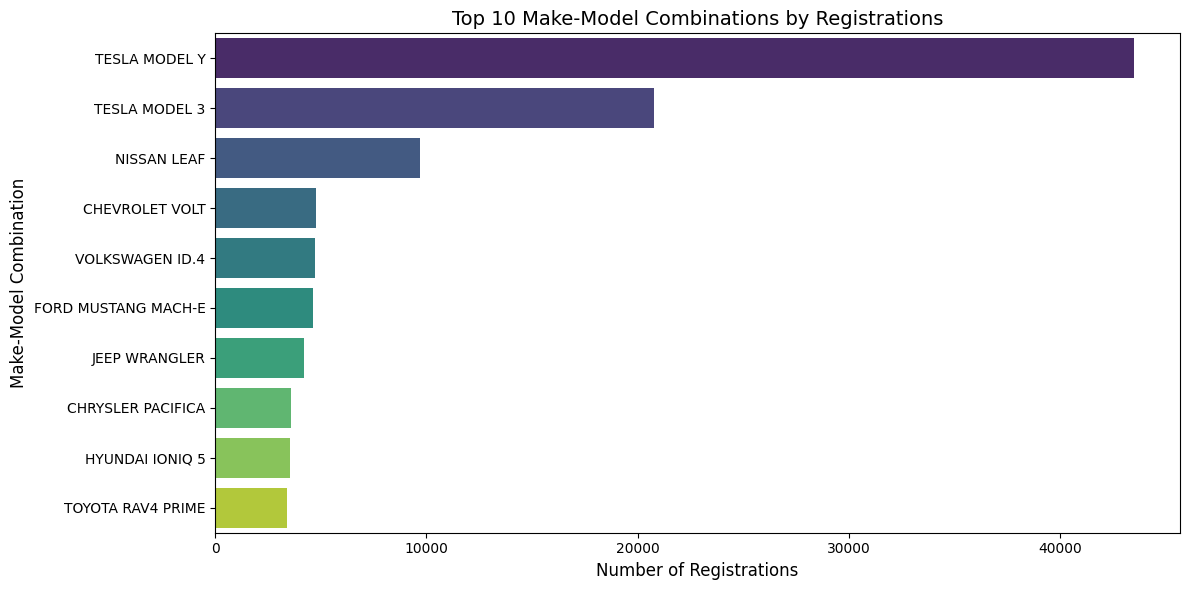

In [35]:
# Visualization of Top 10 Make-Model Combinations

# Group by Make and Model, then count occurrences
top_make_model = data.groupby(['Make', 'Model']).size().reset_index(name='Count')

# Sort by count in descending order and get the top 10
top_10_make_model = top_make_model.sort_values(by='Count', ascending=False).head(10)
top_10_make_model = top_10_make_model.reset_index(drop=True)

# Display the top 10 combinations
print(top_10_make_model)

print("\n")

# Visualization
plt.figure(figsize=(12, 6))

# Create a bar plot for the top 10 make-model combinations
sns.barplot(x='Count', y=top_10_make_model.index, data=top_10_make_model, orient='h', palette='viridis')

# Add labels
plt.xlabel('Number of Registrations', fontsize=12)
plt.ylabel('Make-Model Combination', fontsize=12)
plt.title('Top 10 Make-Model Combinations by Registrations', fontsize=14)

# Customizing the tick labels to show Make-Model combination
plt.yticks(ticks=top_10_make_model.index, labels=[f"{row['Make']} {row['Model']}" for _, row in top_10_make_model.iterrows()])

# Display the plot
plt.tight_layout()
plt.show()



**Top 3 Make-Model Combinations in 2024**

In [36]:
# Filter the dataset for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Group by Make and Model, then count occurrences
top_make_model_2024 = data_2024.groupby(['Make', 'Model']).size().reset_index(name='Count')

# Sort by count in descending order and get the top 3
top_3_make_model_2024 = top_make_model_2024.sort_values(by='Count', ascending=False).head(3)

# Display the result
print(top_3_make_model_2024)


     Make     Model  Count
82  TESLA   MODEL Y  10646
79  TESLA   MODEL 3   4361
40   JEEP  WRANGLER   1623


**Top Electric Vehicle Type in 2024**

In [37]:
# Filter the dataset for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Group by Electric Vehicle Type and count occurrences
top_ev_type_2024 = data_2024['Electric Vehicle Type'].value_counts().reset_index()
top_ev_type_2024.columns = ['Electric Vehicle Type', 'Count']

# Display the most sold EV type in 2024
print(top_ev_type_2024.head(1))


            Electric Vehicle Type  Count
0  Battery Electric Vehicle (BEV)  33950


**Electric Vehicle Type and Clean Alternative Fuel Vehicle (CAFV) Eligibility for the top-sold Make and Model in 2024**

In [38]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Group by 'Make' and 'Model' and count the occurrences
top_sold = data_2024.groupby(['Make', 'Model']).size().idxmax()

# Extract the most frequent Make and Model
top_make, top_model = top_sold

# Filter the data for the top Make and Model in 2024
top_vehicle_data = data_2024[(data_2024['Make'] == top_make) & (data_2024['Model'] == top_model)]

# Get the Electric Vehicle Type and CAFV Eligibility for the top model
ev_type = top_vehicle_data['Electric Vehicle Type'].unique()[0]
cafv_eligibility = top_vehicle_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()[0]

# Display the results
print(f"Top-Sold Make and Model in 2024: {top_make} {top_model}")
print(f"Electric Vehicle Type: {ev_type}")
print(f"CAFV Eligibility: {cafv_eligibility}")



Top-Sold Make and Model in 2024: TESLA MODEL Y
Electric Vehicle Type: Battery Electric Vehicle (BEV)
CAFV Eligibility: Eligibility unknown as battery range has not been researched


**Top-selling electric vehicle model in 2024 and its Electric Vehicle Type**

In [39]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Group by 'Make' and 'Model' and count the occurrences to find the top-selling model
top_sold_model_2024 = data_2024.groupby(['Make', 'Model']).size().idxmax()

# Extract the most frequent Make and Model
top_make_2024, top_model_2024 = top_sold_model_2024

# Filter the data for the top Make and Model in 2024
top_model_data = data_2024[(data_2024['Make'] == top_make_2024) & (data_2024['Model'] == top_model_2024)]

# Get the Electric Vehicle Type for the top-selling model
ev_type = top_model_data['Electric Vehicle Type'].unique()[0]

# Display the results
print(f"Top-Selling Make and Model in 2024: {top_make_2024} {top_model_2024}")
print(f"Electric Vehicle Type: {ev_type}")


Top-Selling Make and Model in 2024: TESLA MODEL Y
Electric Vehicle Type: Battery Electric Vehicle (BEV)


**Electric vehicles (EVs) registered in each city in 2024**

In [40]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Count the number of registrations by 'City'
city_registrations_2024 = data_2024['City'].value_counts()

# Display the result
print("Number of EVs registered in each city in 2024:")
print(city_registrations_2024)



Number of EVs registered in each city in 2024:
City
Seattle        6175
Bellevue       2367
Renton         1745
Vancouver      1579
Redmond        1513
               ... 
Farmington        1
Clayton           1
Annapolis         1
Mansfield         1
Centerville       1
Name: count, Length: 417, dtype: int64


**Top 3 cities where electric vehicles (EVs) are registered the most in 2024**

In [41]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Count the number of EV registrations in each city
top_cities_2024 = data_2024['City'].value_counts().head(3)

# Display the result
print("Top 3 cities with the most EV registrations in 2024:")
print(top_cities_2024)


Top 3 cities with the most EV registrations in 2024:
City
Seattle     6175
Bellevue    2367
Renton      1745
Name: count, dtype: int64


**Market share of each electric vehicle make in 2024**

In [42]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Calculate the market share by Make
market_share_2024 = data_2024['Make'].value_counts(normalize=True) * 100

# Display the result
print("Market share of each electric vehicle make in 2024:")
print(market_share_2024)


Market share of each electric vehicle make in 2024:
Make
TESLA                     38.976451
KIA                        7.695160
TOYOTA                     6.047191
JEEP                       4.821064
HYUNDAI                    4.821064
BMW                        4.700538
RIVIAN                     3.453551
CHEVROLET                  2.962173
FORD                       2.772112
NISSAN                     2.484702
VOLVO                      2.113851
SUBARU                     1.963193
AUDI                       1.953922
CADILLAC                   1.877434
HONDA                      1.840349
MAZDA                      1.712869
DODGE                      1.643334
CHRYSLER                   1.249305
VOLKSWAGEN                 1.154274
LEXUS                      1.112553
MERCEDES-BENZ              1.068515
POLESTAR                   0.811237
MINI                       0.574819
GMC                        0.502967
PORSCHE                    0.308270
GENESIS                    0.266549
ACURA  

**Correlation between Model Year and Electric Range for EVs**

In [43]:
# Calculate the correlation between Model Year and Electric Range
correlation = data_cleaned[['Model Year', 'Electric Range']].corr()

# Display the result
print("Correlation between Model Year and Electric Range:")
print(correlation)


Correlation between Model Year and Electric Range:
                Model Year  Electric Range
Model Year        1.000000        0.313846
Electric Range    0.313846        1.000000


**The city which has the highest number of EV registrations in 2023**

In [44]:
# Filter data for the year 2023
data_2023 = data[data['Model Year'] == 2023]

# Find the city with the highest number of registrations
top_city_2023 = data_2023['City'].value_counts().idxmax()

# Display the result
print(f"The city with the highest number of EV registrations in 2023 is: {top_city_2023}")


The city with the highest number of EV registrations in 2023 is: Seattle


**Distribution of electric vehicle types (BEVs and PHEVs) in 2024**

In [45]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Count the number of each electric vehicle type in 2024
ev_type_distribution_2024 = data_2024['Electric Vehicle Type'].value_counts()

# Display the result
print("Distribution of Electric Vehicle Types in 2024:")
print(ev_type_distribution_2024)


Distribution of Electric Vehicle Types in 2024:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            33950
Plug-in Hybrid Electric Vehicle (PHEV)     9194
Name: count, dtype: int64


**Count of electric vehicles which are eligible for CAFV benefits in 2024**

In [46]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Count the number of vehicles that are eligible for CAFV benefits
cafv_eligible_2024 = data_2024['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Display the result
print("CAFV Eligibility distribution in 2024:")
print(cafv_eligible_2024)


CAFV Eligibility distribution in 2024:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    33950
Clean Alternative Fuel Vehicle Eligible                          5978
Not eligible due to low battery range                            3216
Name: count, dtype: int64


**Variation in the number of electric vehicles (EVs) registered across different legislative districts in 2024**

In [47]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Count the number of registrations by 'Legislative District'
district_registrations_2024 = data_2024['Legislative District'].value_counts()

# Display the result
print("Number of EVs registered in each legislative district in 2024:")
print(district_registrations_2024)


Number of EVs registered in each legislative district in 2024:
Legislative District
11.0    2650
41.0    2648
48.0    2537
45.0    2257
1.0     1798
5.0     1749
36.0    1549
46.0    1371
43.0    1344
44.0    1263
21.0    1171
37.0    1159
18.0    1111
47.0    1068
32.0    1059
34.0    1052
22.0     922
31.0     870
33.0     869
26.0     858
23.0     758
17.0     727
10.0     684
30.0     671
25.0     663
49.0     647
40.0     645
28.0     636
39.0     629
2.0      612
35.0     594
27.0     587
4.0      553
42.0     552
6.0      526
38.0     473
8.0      431
20.0     413
24.0     409
29.0     407
12.0     386
13.0     290
3.0      260
14.0     253
9.0      250
7.0      238
19.0     225
16.0     202
15.0     118
Name: count, dtype: int64


**Top-selling electric vehicle model in 2024**

In [48]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Find the top-selling EV model in 2024
top_model_2024 = data_2024['Model'].value_counts().idxmax()

# Display the result
print(f"Top-selling electric vehicle model in 2024: {top_model_2024}")


Top-selling electric vehicle model in 2024: MODEL Y


**The electric vehicle that has the highest number of registrations in 2024**

In [49]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Find the make with the highest number of registrations in 2024
top_make_2024 = data_2024['Make'].value_counts().idxmax()

# Display the result
print(f"Electric vehicle make with the highest number of registrations in 2024: {top_make_2024}")


Electric vehicle make with the highest number of registrations in 2024: TESLA


**Average electric range for each electric vehicle make in 2024**

In [50]:
# Filter data for the year 2024
datac_2024 = data_cleaned[data_cleaned['Model Year'] == 2024]

# Calculate the average electric range by Make
avg_range_by_make_2024 = datac_2024.groupby('Make')['Electric Range'].mean()

# Display the result
print("Average electric range by make in 2024:")
print(avg_range_by_make_2024)


Average electric range by make in 2024:
Make
ALFA ROMEO       33.000000
AUDI             23.000000
BENTLEY          28.000000
BMW              37.137291
CHRYSLER         32.000000
DODGE            32.000000
FORD             37.000000
HYUNDAI          33.000000
JEEP             21.878846
KIA              33.449915
LAMBORGHINI       6.000000
LEXUS            36.838926
LINCOLN          28.000000
MAZDA            26.000000
MERCEDES-BENZ    47.918367
MITSUBISHI       38.000000
PORSCHE          43.000000
TOYOTA           41.296774
VOLVO            34.455662
Name: Electric Range, dtype: float64


**Total number of electric vehicles (EVs) registered in each legislative district in 2024**

In [51]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Count the number of EV registrations by legislative district
district_registrations_2024 = data_2024['Legislative District'].value_counts()

# Display the result
print("Number of EV registrations by legislative district in 2024:")
print(district_registrations_2024)


Number of EV registrations by legislative district in 2024:
Legislative District
11.0    2650
41.0    2648
48.0    2537
45.0    2257
1.0     1798
5.0     1749
36.0    1549
46.0    1371
43.0    1344
44.0    1263
21.0    1171
37.0    1159
18.0    1111
47.0    1068
32.0    1059
34.0    1052
22.0     922
31.0     870
33.0     869
26.0     858
23.0     758
17.0     727
10.0     684
30.0     671
25.0     663
49.0     647
40.0     645
28.0     636
39.0     629
2.0      612
35.0     594
27.0     587
4.0      553
42.0     552
6.0      526
38.0     473
8.0      431
20.0     413
24.0     409
29.0     407
12.0     386
13.0     290
3.0      260
14.0     253
9.0      250
7.0      238
19.0     225
16.0     202
15.0     118
Name: count, dtype: int64


**Count of electric vehicles (EVs) which are eligible for CAFV benefits in 2024**

In [52]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Count the number of vehicles eligible for CAFV benefits
cafv_eligible_2024 = data_2024['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Display the result
print("CAFV Eligibility distribution in 2024:")
print(cafv_eligible_2024)


CAFV Eligibility distribution in 2024:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    33950
Clean Alternative Fuel Vehicle Eligible                          5978
Not eligible due to low battery range                            3216
Name: count, dtype: int64


**The legislative district that has the highest number of EV registrations in 2024**

In [53]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Find the legislative district with the highest number of EV registrations
top_district_2024 = data_2024['Legislative District'].value_counts().idxmax()

# Display the result
print(f"Legislative district with the highest number of EV registrations in 2024: {top_district_2024}")


Legislative district with the highest number of EV registrations in 2024: 11.0


**Total number of electric vehicles (EVs) registered by each electric utility in 2024**

In [54]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Count the number of EV registrations by electric utility
utility_registrations_2024 = data_2024['Electric Utility'].value_counts()

# Display the result
print("Number of EV registrations by electric utility in 2024:")
print(utility_registrations_2024)


Number of EV registrations by electric utility in 2024:
Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                                 16859
PUGET SOUND ENERGY INC                                                                                         8728
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                                   6684
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                               2495
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                2007
                                                                                                              ...  
BONNEVILLE POWER ADMINISTRATION||BENTON RURAL ELECTRIC ASSN                                                       1
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY                                                          1

**Change in the number of electric vehicles (EVs) registered from 2020 to 2024**

In [55]:
# Filter data for the years 2020 to 2024
data_2020_2024 = data[data['Model Year'].isin([2020, 2021, 2022, 2023, 2024])]

# Count the number of EV registrations by year
registrations_by_year = data_2020_2024.groupby('Model Year').size()

# Display the result
print("Number of EV registrations from 2020 to 2024:")
print(registrations_by_year)


Number of EV registrations from 2020 to 2024:
Model Year
2020     1856
2021    19663
2022    28661
2023    59820
2024    43144
dtype: int64


**Percentage of EVs eligible for CAFV (Clean Alternative Fuel Vehicle) benefits in 2024**

In [56]:
# Calculate the percentage of vehicles eligible for CAFV benefits
cafv_percentage_2024 = data_2024['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) * 100

# Display the result
print("CAFV Eligibility percentage in 2024:")
print(cafv_percentage_2024)


CAFV Eligibility percentage in 2024:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    78.689968
Clean Alternative Fuel Vehicle Eligible                         13.855924
Not eligible due to low battery range                            7.454107
Name: proportion, dtype: float64


**Market share of each electric vehicle type (BEVs vs PHEVs) in 2024**

In [57]:
# Count the number of BEVs and PHEVs in 2024
ev_type_share_2024 = data_2024['Electric Vehicle Type'].value_counts(normalize=True) * 100

# Display the result
print("Market share of BEVs and PHEVs in 2024:")
print(ev_type_share_2024)


Market share of BEVs and PHEVs in 2024:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            78.689968
Plug-in Hybrid Electric Vehicle (PHEV)    21.310032
Name: proportion, dtype: float64


**Change in the number of registrations for the top 5 electric vehicle models by year**

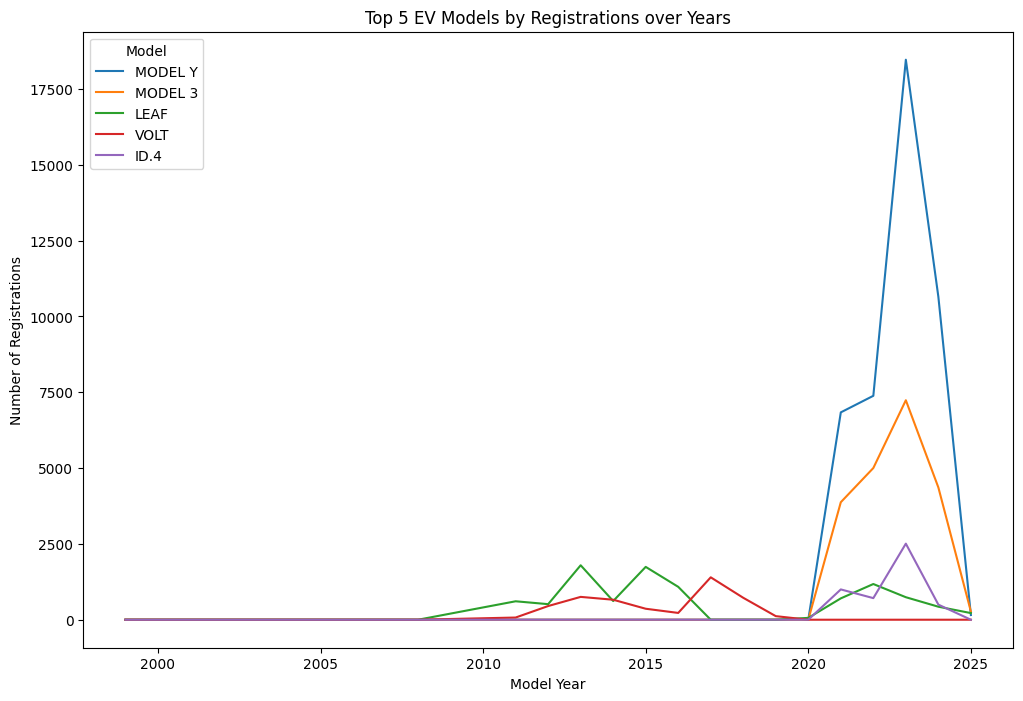

In [58]:
# Count the number of registrations by Model and Model Year
top_models_by_year = data.groupby(['Model Year', 'Model']).size().unstack().fillna(0)

# Filter the top 5 models by total registrations
top_5_models = top_models_by_year.sum(axis=0).nlargest(5).index

# Plot the trend for the top 5 models
top_models_by_year[top_5_models].plot(kind='line', figsize=(12, 8), title='Top 5 EV Models by Registrations over Years')
plt.ylabel('Number of Registrations')
plt.show()


**Trend in the number of electric vehicles (EVs) by model year from 2015 to 2024**

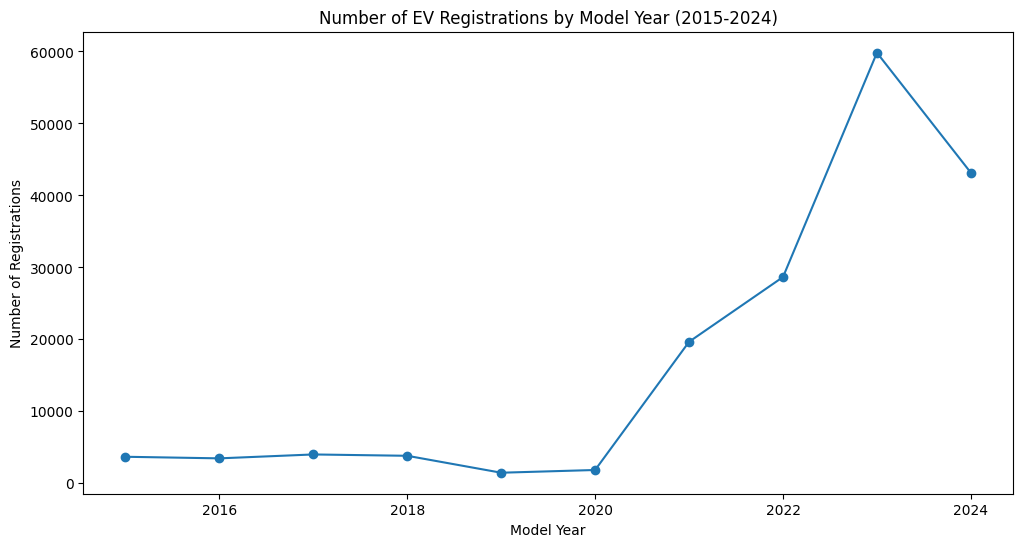

In [59]:
# Filter data from 2015 to 2024
data_2015_2024 = data[data['Model Year'].between(2015, 2024)]

# Count the number of registrations by Model Year
ev_trend_by_year = data_2015_2024['Model Year'].value_counts().sort_index()

# Plot the trend
ev_trend_by_year.plot(kind='line', marker='o', figsize=(12, 6), title='Number of EV Registrations by Model Year (2015-2024)')
plt.ylabel('Number of Registrations')
plt.show()


**Most common electric vehicle type (BEV vs PHEV) for each make in 2024**

In [60]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Find the most common EV type (BEV or PHEV) for each make
most_common_type_by_make = data_2024.groupby('Make')['Electric Vehicle Type'].agg(lambda x: x.mode()[0])

# Display the result
print("Most common EV type for each make in 2024:")
print(most_common_type_by_make)


Most common EV type for each make in 2024:
Make
ACURA                             Battery Electric Vehicle (BEV)
ALFA ROMEO                Plug-in Hybrid Electric Vehicle (PHEV)
AUDI                              Battery Electric Vehicle (BEV)
BENTLEY                   Plug-in Hybrid Electric Vehicle (PHEV)
BMW                               Battery Electric Vehicle (BEV)
BRIGHTDROP                        Battery Electric Vehicle (BEV)
CADILLAC                          Battery Electric Vehicle (BEV)
CHEVROLET                         Battery Electric Vehicle (BEV)
CHRYSLER                  Plug-in Hybrid Electric Vehicle (PHEV)
DODGE                     Plug-in Hybrid Electric Vehicle (PHEV)
FIAT                              Battery Electric Vehicle (BEV)
FORD                              Battery Electric Vehicle (BEV)
GENESIS                           Battery Electric Vehicle (BEV)
GMC                               Battery Electric Vehicle (BEV)
HONDA                             Battery 

**Average number of registrations per legislative district in 2024**

In [61]:
# Filter data for the year 2024
data_2024 = data[data['Model Year'] == 2024]

# Calculate the average number of registrations per legislative district
avg_registrations_by_district_2024 = data_2024.groupby('Legislative District').size().mean()

# Display the result
print(f"Average number of EV registrations per legislative district in 2024: {avg_registrations_by_district_2024}")


Average number of EV registrations per legislative district in 2024: 880.4897959183673


**The median electric range of EVs by Model Year**

In [62]:
# Calculate the median electric range by Model Year
median_range_by_year = data_cleaned.groupby('Model Year')['Electric Range'].median()

# Display the result
print("Median Electric Range by Model Year:")
print(median_range_by_year)


Median Electric Range by Model Year:
Model Year
2011    35.0
2012    35.0
2013    19.0
2014    19.0
2015    19.0
2016    19.0
2017    21.0
2018    25.0
2019    25.0
2020    25.0
2021    25.0
2022    30.0
2023    32.0
2024    32.0
2025    35.0
Name: Electric Range, dtype: float64


**Top 5 electric vehicle makes based on their electric range in 2024**

In [63]:
# Filter data for the year 2024
datac_2024 = data_cleaned[data_cleaned['Model Year'] == 2024]

# Calculate the average electric range for each make in 2024
avg_range_by_make_2024 = datac_2024.groupby('Make')['Electric Range'].mean()

# Display the top 5 makes based on electric range
top_5_makes_by_range = avg_range_by_make_2024.nlargest(5)

# Display the result
print("Top 5 EV makes by average electric range in 2024:")
print(top_5_makes_by_range)


Top 5 EV makes by average electric range in 2024:
Make
MERCEDES-BENZ    47.918367
PORSCHE          43.000000
TOYOTA           41.296774
MITSUBISHI       38.000000
BMW              37.137291
Name: Electric Range, dtype: float64


**Top 5 Cities with lowest EV registrations**

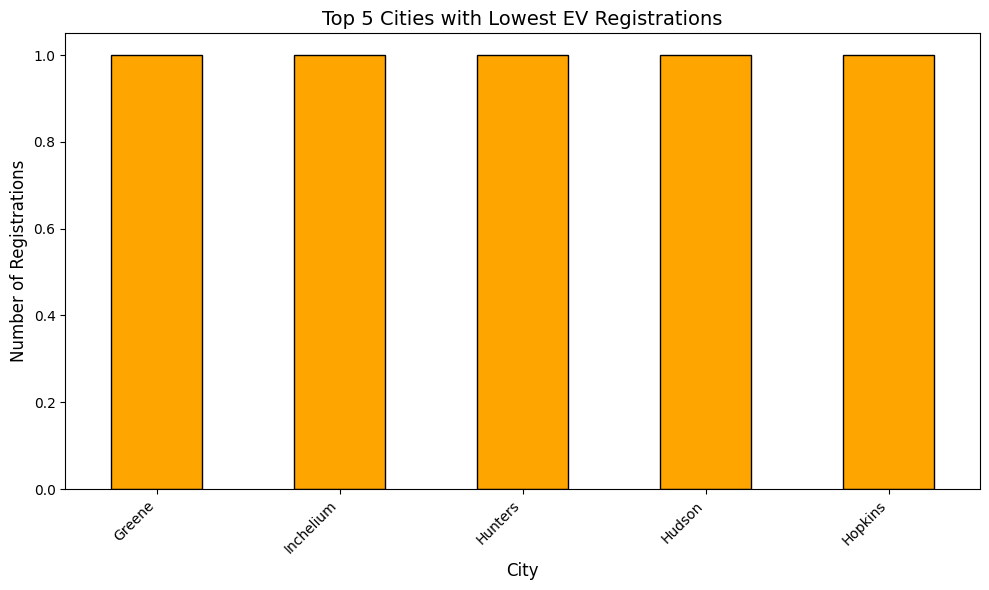

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by 'City' and calculating the total EV registrations
city_counts = data.groupby('City').size().sort_values(ascending=True)

# Extracting the 5 cities with the lowest EV registrations
lowest_cities = city_counts.head(5)

# Plotting the data
plt.figure(figsize=(10, 6))
lowest_cities.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 5 Cities with Lowest EV Registrations', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Registrations', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Make and Model Combinations with Least Sales in 2024 (Potential Discontinuation)**

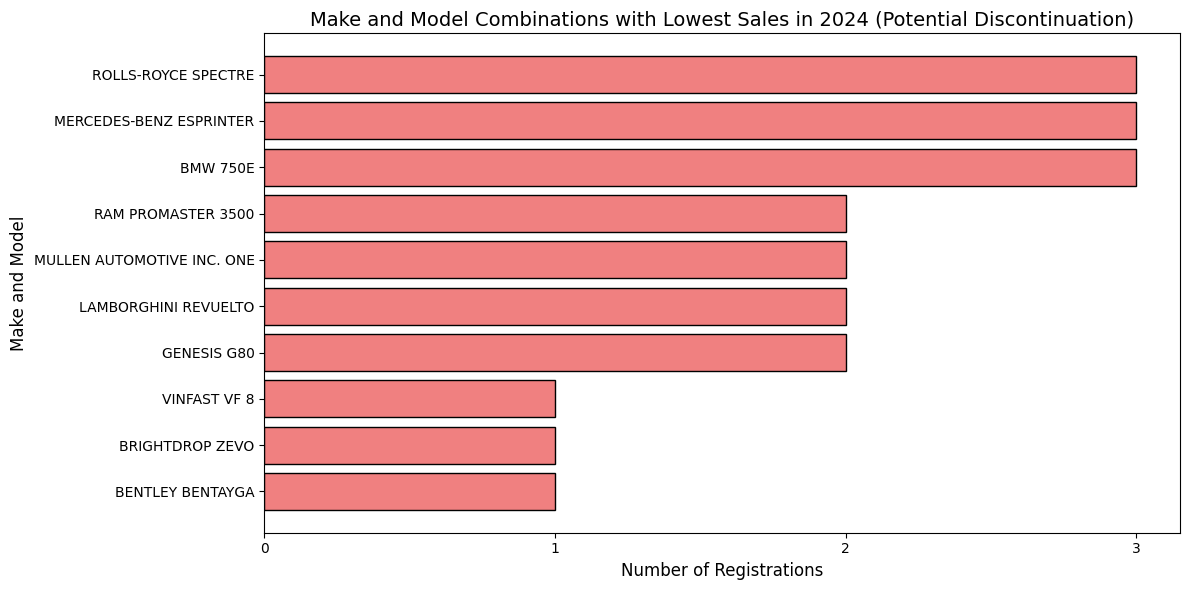

In [72]:
# Filter make and model combinations with sales <= 5 in 2024
low_sales_combinations = data_2024.groupby(['Make', 'Model']).size().reset_index(name='Count')
low_sales_combinations = low_sales_combinations[low_sales_combinations['Count'] <= 5]

# Sort by Count (ascending) to highlight the lowest sales
low_sales_combinations = low_sales_combinations.sort_values(by='Count', ascending=True)

# Plot the make and model combinations with the lowest sales
plt.figure(figsize=(12, 6))
plt.barh(
    low_sales_combinations['Make'] + ' ' + low_sales_combinations['Model'],
    low_sales_combinations['Count'],
    color='lightcoral',
    edgecolor='black'
)
plt.title('Make and Model Combinations with Lowest Sales in 2024 (Potential Discontinuation)', fontsize=14)
plt.xlabel('Number of Registrations', fontsize=12)
plt.ylabel('Make and Model', fontsize=12)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


**Makes with least number of EV registrations till 2024**

Make with the least registrations: VINFAST
Total registrations: 2


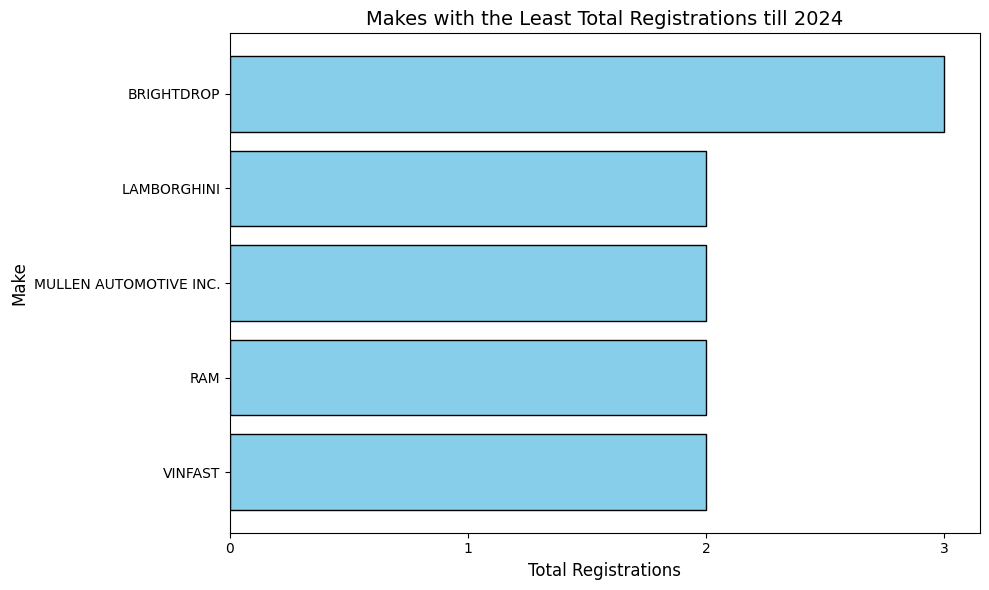

In [74]:
# Group the data by 'Make' and calculate the total registrations for each make
make_sales = data.groupby('Make').size().reset_index(name='Total_Registrations')

# Find the make with the least total registrations
least_sales_make = make_sales.sort_values(by='Total_Registrations', ascending=True).iloc[0]

print(f"Make with the least registrations: {least_sales_make['Make']}")
print(f"Total registrations: {least_sales_make['Total_Registrations']}")

# Plot the makes with the least registrations (optional: top 5 least sold makes)
least_sales_makes = make_sales.sort_values(by='Total_Registrations', ascending=True).head(5)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(least_sales_makes['Make'], least_sales_makes['Total_Registrations'], color='skyblue', edgecolor='black')
plt.title('Makes with the Least Total Registrations till 2024', fontsize=14)
plt.xlabel('Total Registrations', fontsize=12)
plt.ylabel('Make', fontsize=12)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


**Counties with the least EV registrations**

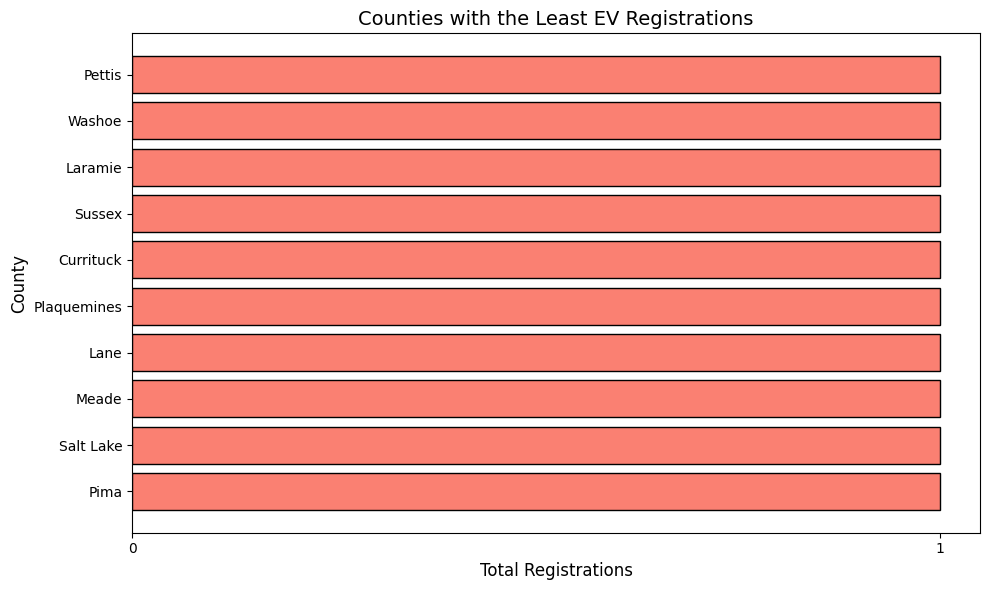

In [77]:
# Group the data by 'County' and calculate the total registrations
county_registrations = data['County'].value_counts().reset_index()
county_registrations.columns = ['County', 'Total_Registrations']

# Plot the 5 counties with the least registrations
least_registration_counties = county_registrations.tail(10)  # Take the 5 least-registered counties

# Plot
plt.figure(figsize=(10, 6))
plt.barh(least_registration_counties['County'], least_registration_counties['Total_Registrations'], color='salmon', edgecolor='black')
plt.title('Counties with the Least EV Registrations', fontsize=14)
plt.xlabel('Total Registrations', fontsize=12)
plt.ylabel('County', fontsize=12)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


**Top 10 Make-Model Combinations with Highest Average Electric Range**

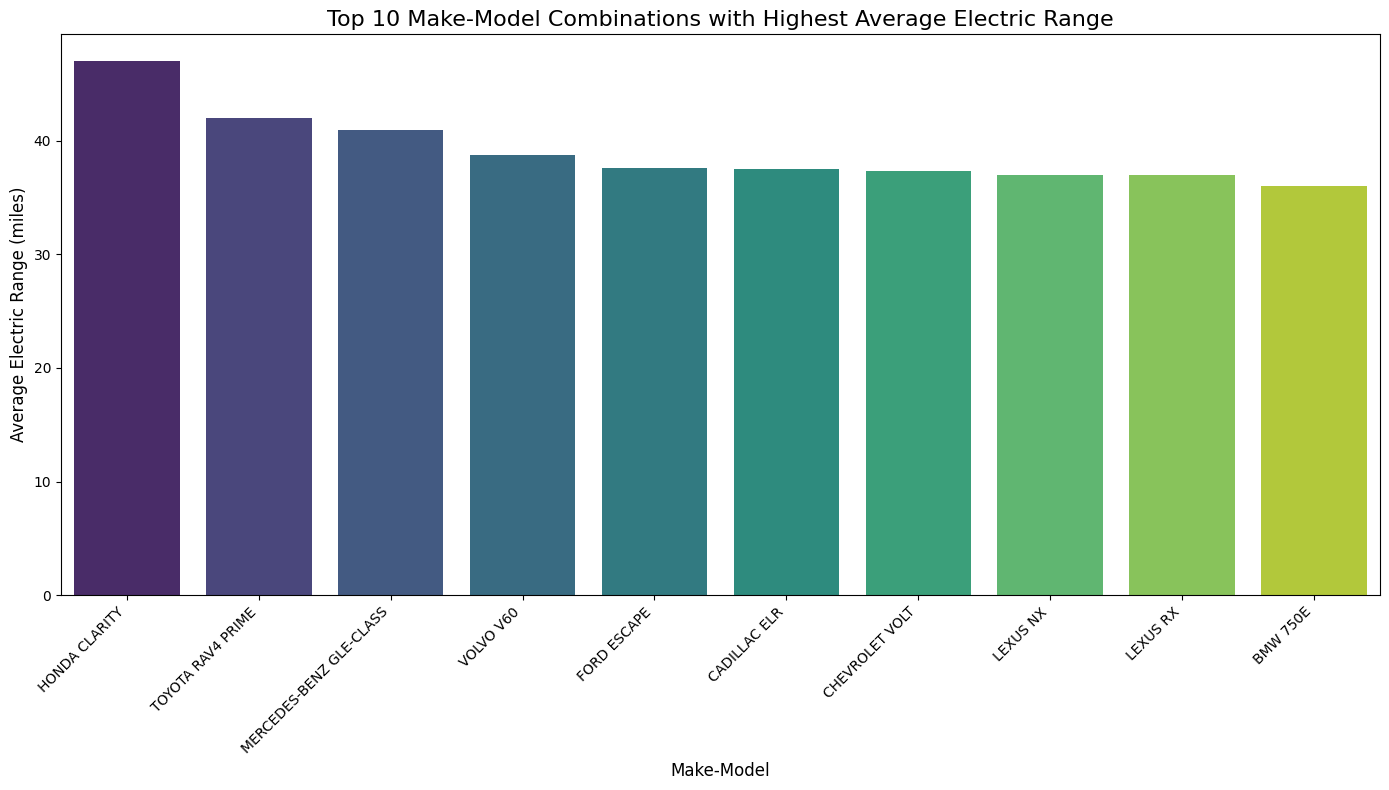

In [80]:
# Group by Make and Model, then calculate the average Electric Range for each combination
make_model_avg_range = data_cleaned.groupby(['Make', 'Model'])['Electric Range'].mean().reset_index()

# Sort by the average electric range in descending order and select the top 10
top_10_make_model = make_model_avg_range.sort_values(by='Electric Range', ascending=False).head(10)

# Create a column for Make-Model combination for easy labeling
top_10_make_model['Make-Model'] = top_10_make_model['Make'] + ' ' + top_10_make_model['Model']

# Plotting the bar plot for average Electric Range by Make-Model combination
plt.figure(figsize=(14, 8))
sns.barplot(x='Make-Model', y='Electric Range', data=top_10_make_model, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Top 10 Make-Model Combinations with Highest Average Electric Range', fontsize=16)
plt.xlabel('Make-Model', fontsize=12)
plt.ylabel('Average Electric Range (miles)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()




**Top 10 Make-Model Combinations with Least Average Electric Range**

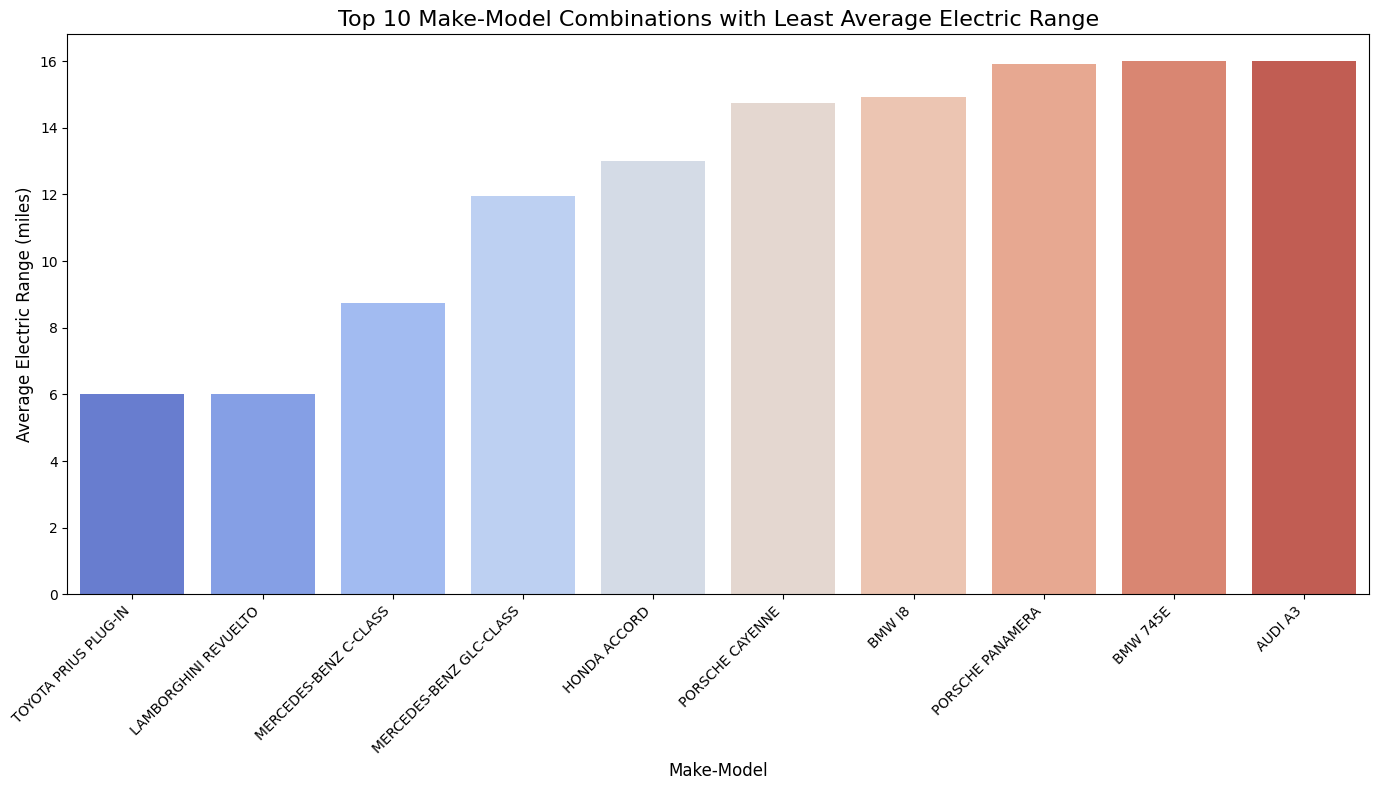

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Make and Model, then calculate the average Electric Range for each combination
make_model_avg_range = data_cleaned.groupby(['Make', 'Model'])['Electric Range'].mean().reset_index()

# Sort by the average electric range in ascending order and select the top 10 combinations with least electric range
bottom_10_make_model = make_model_avg_range.sort_values(by='Electric Range', ascending=True).head(10)

# Create a column for Make-Model combination for easy labeling
bottom_10_make_model['Make-Model'] = bottom_10_make_model['Make'] + ' ' + bottom_10_make_model['Model']

# Plotting the bar plot for average Electric Range by Make-Model combination
plt.figure(figsize=(14, 8))
sns.barplot(x='Make-Model', y='Electric Range', data=bottom_10_make_model, palette='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Top 10 Make-Model Combinations with Least Average Electric Range', fontsize=16)
plt.xlabel('Make-Model', fontsize=12)
plt.ylabel('Average Electric Range (miles)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# **Conclusion**

This analysis provided a detailed look into the characteristics and trends of EV registrations in Washington State.

Key insights include:

* The rising popularity of BEVs over PHEVs. There are 136,013 BEVs, indicating they form the majority of the electric vehicles in the dataset. There are 44,607 PHEVs, showing they are less common than BEVs.

* King is the top County which has maximum number of EV registrations.

* Maximum number of EV registrations happened in the year 2023, followed by the years 2024 and 2022.

* Maximum number of registrations occured in Legislative District 41.0 and minimum registrations occured in Legislative District 15.0.

* Top 5 Make-Model combinations are TESLA MODEL Y, TESLA MODEL 3, NISSAN LEAF, Chevrolet VOLT and Volksvagen ID.4.

* For most of the BEVs, Clean Fuel Eligibility is unknown as battery range has not been researched. And the rest are eligible. For PHEVs, some are not eligible due to low battery range and the others are eligible.

* Top 3 electric utilities serving EVs are Pugent Sound Energy Inc || City of Tacoma - (WA), Puget Sound Energy Inc, City of Seattle - (WA) | City of Tacoma - (WA).

* EV registrations are minimum in the cities Greene, Inchelium, Hunters, Hudson, Hopkins.

* Counties with least EV registrations are Lane, Meade, Salt Lake, Pima.

* The Make-Model with highest average electric range is Honda Clarity, followed by Toyota Rav 4 Prime and Mercedes Benz GLE - class.

* The Make-Model with least electric range is Toyota Prius Plug-in, followed by Lamborghini Revuelto.

* Makes with least number of EV registrations are Brightdrop, Lamborghini, Mullen Automotive Inc, RAM.

**Analysis has been done specifically for the year 2024.**

**In 2024:**

* Top 3 Make - Model combinations are TESLA MODEL Y, TESLA MODEL 3, JEEP WRANGLER

* Top electric vehicle type is BEV

* Top 3 cities where EVs are registered the most are Seattle, Bellevue, Renton.

* Market share is high for Tesla with 38.97 %, followed by KIA with 7.69 % and Toyota with 6.04 %.

* The Legislative District that has maximum number of EV registrations is 11.0.

* Average number of registrations per LD is 880.48.

* Median electric range of EVs is 32 miles.

* Top 3 EV Makes by average electric range is Mercedez Benz with avg electric range of 47.91, Porsche with avg electric range of 43.00 and Toyota with avg electric range of 41.29.

* Make-Model combinations with least sales are Bentley Bentaya, Brightdrop Zevo, Vinfast VF 8, Genesis G80, Lamborghini Revuelto.





# **Limitations**

* Data limited to Washington State.

* Lack of additional consumer demographics or charging infrastructure information.

# **Future Work**

* Extend analysis to include nationwide datasets for comparative insights.

* Incorporate data on charging stations and incentives.

* Explore machine learning models for predicting future EV adoption trends.